In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy
import scipy.signal as signal
import scipy.stats as stats
from scipy.interpolate import spline
from statsmodels.robust.scale import mad
import scipy.io as sio
import hsutil
from importlib import reload
%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-paper')

In [2]:
path = 'D:\\Dropbox\\labwork\\behavior\\heatseeking-pilot\\'
dot = ['20171011-orl1003-1',
    '20171014-orl1003-0',
    '20171016-orl1003-1',
    '20171019-orl1010-0',
    '20171019-orl1010-2',
      '20171021_orl1010-1',
      '20171021_orl1010-3',
      '20171023_orl1010-1']
blank = ['20171014-orl1003-1',
    '20171016-orl1003-0',
    '20171016-orl1003-2',
    '20171019-orl1010-1',
    '20171021_orl1010-0',
        '20171021_orl1010-2',
        '20171023_orl1010-0',
        '20171023_orl1010-2']

In [16]:
fn = dot[3]
dat = sio.loadmat(path+fn+'\\'+fn+'_topy.mat')
np.transpose(dat['Rtemp'])[0]

array([ 26.03,  26.03,  26.03, ...,  26.07,  26.07,  26.07])

In [3]:
reload(hsutil)
[cRtot,cRtemp] = hsutil.itergetmat(path,blank)
[dRtot,dRtemp] = hsutil.itergetmat(path,dot)

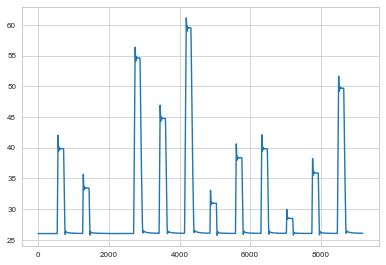

In [4]:
plt.plot(dRtemp[3,:])

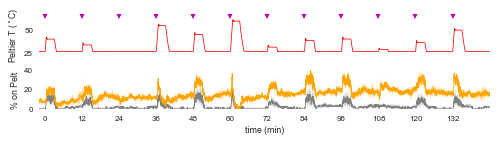

In [11]:
reload(hsutil)

t = np.array(range(-540,8640)) / 60.

f,ax = plt.subplots(2,sharex=True)
f.set_size_inches(7,2)

ax[0] = hsutil.plot_trace(t,dRtemp,c='r',ax=ax[0],indiv=False,med=True)
ax[0].set_xlim(min(t),max(t))
ax[0].set_xticks(range(0,144,12))
ax[0].set_ylabel('Peltier T ($^\circ$C)')

ax[1] = hsutil.plot_trace(t,cRtot*100,c='0.5',ax=ax[1],indiv=False,med=True)
ax[1].set_xlabel('time (min)')
#ax[2].text(136,0.38,'n=8',color='0.5')

ax[1] = hsutil.plot_trace(t,dRtot*100,c='orange',ax=ax[1],indiv=False,med=True)
ax[1].set_ylim(-1,40)
ax[1].set_yticks(np.arange(0,45,20))
ax[1].set_ylabel('% on Pelt')
#ax[1].text(136,0.38,'n=8',color='orange')

ax[0].plot(range(0,144,12),[65]*12,'mv')

for a in ax:
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)
    a.spines['left'].set_visible(False)
    a.spines['bottom'].set_visible(False)
    a.xaxis.grid(False)
    a.yaxis.grid(False)

ax[0].set_xlim([-2,8640/60])
plt.tight_layout()
plt.savefig('shuffle_graph.pdf')

C:\Users\liber\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


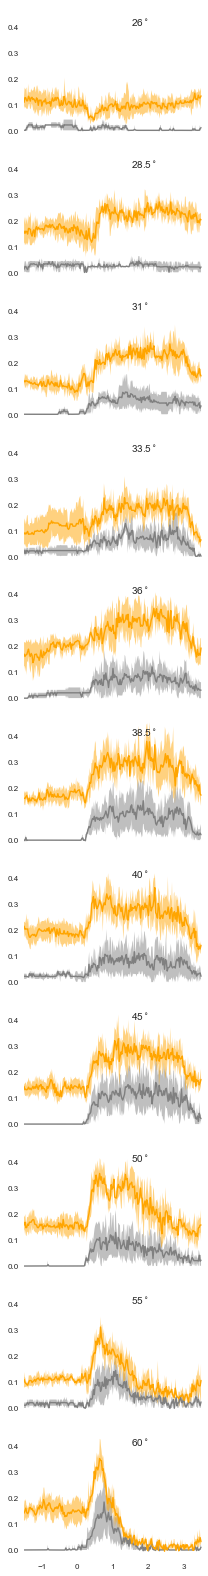

In [44]:
labels = ['33.5$^\circ$','26$^\circ$','55$^\circ$','45$^\circ$','60$^\circ$',
                    '31$^\circ$','38.5$^\circ$','40$^\circ$','28.5$^\circ$','36$^\circ$','50$^\circ$']

order = [1,8,5,0,9,6,7,3,10,2,4]

heat = range(720+540,9180,720)
before = 90
after = 30

data = [cRtot,dRtot]
ls = ['0.5','orange']

f,ax = plt.subplots(len(heat),1,sharex=True,sharey=True)
f.set_size_inches(3,2*len(heat))

for i in range(len(ax)):
    j = order[i]
    
    # cosmetic
    #ax[i].axvline(-before/60,0,color=c[i],alpha=0.2,edgecolor='none')
    #ax[i].axvspan(3,3+after/60,color=c[i],alpha=0.2,edgecolor='none')
    ax[i].set_xlim(-before/60.,3+after/60.)
    ax[i].text(after/60+3-2,0.4,labels[j])
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)
    ax[i].grid(False)
    #if i < len(ax)-1:
    #    ax[i].set_xticks([])
    
    for k in range(len(data)):
        t = np.arange(-before,180+after)/60.
        #for trace in data[k]:
        #    ax[i].plot(t,trace[heat[i]-before:heat[i]+180+after],c=c[i],alpha=0.1,ls=ls[k])
        dat = np.nanmedian(data[k][:,heat[j]-before:heat[j]+180+after],axis=0)
        sem = mad(data[k][:,heat[j]-before:heat[j]+180+after],axis=0,c=1)
        ax[i].fill_between(t,dat+sem,dat-sem,facecolor=ls[k],edgecolor='none',alpha=0.5)
        tnew = np.linspace(min(t),max(t),200)
        smoothed = spline(t,dat,tnew)
        ax[i].plot(tnew,smoothed,c=ls[k])
        
plt.tight_layout()
plt.savefig('shuffle_timecomp.pdf')

In [5]:
sampling = range(1170,8640,720)
interval = 90

n = len(sampling)
cBase = np.empty([len(cRtot),n])
cBase[:] = np.nan
for i in range(len(cRtot)):
    cBase[i] = [ np.mean(cRtot[i,j:j+interval]) for j in sampling ]
cBase = np.transpose(cBase)

n = len(sampling)
dBase = np.empty([len(dRtot),n])
dBase[:] = np.nan
for i in range(len(dRtot)):
    dBase[i] = [ np.mean(dRtot[i,j:j+interval]) for j in sampling ]
dBase = np.transpose(dBase)

In [6]:
sampling = range(1350,9180,720)
interval = 90

n = len(sampling)
cHeat = np.empty([len(cRtot),n])
cHeat[:] = np.nan
for i in range(len(cRtot)):
    cHeat[i] = [ np.mean(cRtot[i,j:j+interval]) for j in sampling ]
cHeat = np.transpose(cHeat)

n = len(sampling)
dHeat = np.empty([len(dRtot),n])
dHeat[:] = np.nan
for i in range(len(dRtot)):
    dHeat[i] = [ np.mean(dRtot[i,j:j+interval]) for j in sampling ]
dHeat = np.transpose(dHeat)

In [7]:
dat = sio.loadmat(path+'shuffle_dot.mat')
cdot = dat['cdot'][1:]
ddot = dat['ddot'][1:]

In [8]:
order = [1,8,5,0,9,6,7,3,10,2,4]

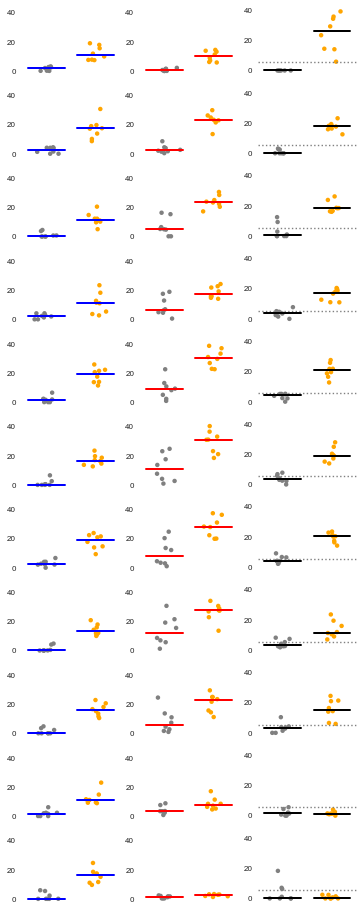

In [8]:
reload(hsutil)
f,ax = plt.subplots(11,3,sharex=True,sharey='col')
pc = ['0.5','orange']
f.set_size_inches(6,16.5)
for i in range(11):
    j = order[i]
    ax[i][0] = hsutil.dotplot(np.vstack([cBase[j],dBase[j]])*100,pc=pc,mc='b',ax=ax[i][0],fixline=False)
    ax[i][1] = hsutil.dotplot(np.vstack([cHeat[j],dHeat[j]])*100,pc=pc,mc='r',ax=ax[i][1],fixline=False)
    ax[i][2] = hsutil.dotplot(np.vstack([cdot[j],ddot[j]])*100,pc=pc,mc='k',ax=ax[i][2],fixline=True)
    for a in ax[i]:
        a.spines['top'].set_visible(False)
        a.spines['right'].set_visible(False)
        a.spines['left'].set_visible(False)
        a.spines['bottom'].set_visible(False)
        a.xaxis.grid(False)
        a.yaxis.grid(False)
ax[-1][-1].set_xlim(-0.5,1.5)
ax[0][0].set_ylim(ax[0][1].get_ylim())
plt.savefig('shuffle_base-heat-dot.pdf')

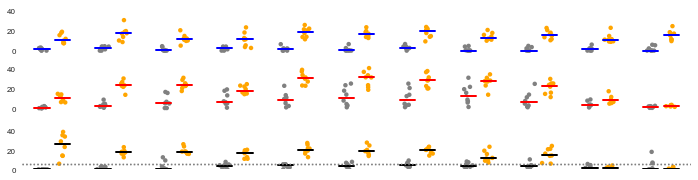

In [9]:
reload(hsutil)
f,ax = plt.subplots(3,1,sharex=True)
pc = ['0.5','orange']
cpos = range(0,33,3)
dpos = range(1,33,3)
f.set_size_inches(12,3)

ax[0] = hsutil.dotplot(cBase[order]*100,pc=pc[0],pos=cpos,mc='b',ax=ax[0],fixline=False)
ax[0] = hsutil.dotplot(dBase[order]*100,pc=pc[1],pos=dpos,mc='b',ax=ax[0],fixline=False)
ax[1] = hsutil.dotplot(cHeat[order]*100,pc=pc[0],pos=cpos,mc='r',ax=ax[1],fixline=False)
ax[1] = hsutil.dotplot(dHeat[order]*100,pc=pc[1],pos=dpos,mc='r',ax=ax[1],fixline=False)
ax[2] = hsutil.dotplot(cdot[order]*100,pc=pc[0],pos=cpos,mc='k',ax=ax[2],fixline=True)
ax[2] = hsutil.dotplot(ddot[order]*100,pc=pc[1],pos=dpos,mc='k',ax=ax[2],fixline=True)
for a in ax:
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)
    a.spines['left'].set_visible(False)
    a.spines['bottom'].set_visible(False)
    a.xaxis.grid(False)
    a.yaxis.grid(False)
ax[0].set_ylim(ax[1].get_ylim())
ax[0].set_yticks(range(0,60,20))
ax[1].set_yticks(range(0,60,20))
ax[2].set_yticks(range(0,60,20))
ax[2].set_ylim([0,50])
ax[0].set_xlim([-1,32])
plt.savefig('shuffle_base-heat-dot_horz.pdf')

In [49]:
hsutil.multiMWU(cBase[order],dBase[order])

MannwhitneyuResult(statistic=0.0, pvalue=0.00046955284955859495)
MannwhitneyuResult(statistic=0.0, pvalue=0.00046548613578750102)
MannwhitneyuResult(statistic=0.0, pvalue=0.00045342837549617443)
MannwhitneyuResult(statistic=5.0, pvalue=0.0026755171950907835)
MannwhitneyuResult(statistic=0.0, pvalue=0.00045342837549617443)
MannwhitneyuResult(statistic=0.0, pvalue=0.00046548613578750102)
MannwhitneyuResult(statistic=0.0, pvalue=0.00046955284955859495)
MannwhitneyuResult(statistic=0.0, pvalue=0.00045342837549617443)
MannwhitneyuResult(statistic=0.0, pvalue=0.0004299484550753648)
MannwhitneyuResult(statistic=0.0, pvalue=0.00046548613578750102)
MannwhitneyuResult(statistic=0.0, pvalue=0.00046548613578750102)
p_adj = 0.004545454545454546


In [50]:
hsutil.multiMWU(cHeat[order],dHeat[order])

MannwhitneyuResult(statistic=0.0, pvalue=0.00046548613578750102)
MannwhitneyuResult(statistic=0.0, pvalue=0.00046955284955859495)
MannwhitneyuResult(statistic=0.0, pvalue=0.00046548613578750102)
MannwhitneyuResult(statistic=8.0, pvalue=0.0067936365319966954)
MannwhitneyuResult(statistic=0.0, pvalue=0.00046955284955859495)
MannwhitneyuResult(statistic=5.0, pvalue=0.0026924700000735156)
MannwhitneyuResult(statistic=5.0, pvalue=0.0026924700000735156)
MannwhitneyuResult(statistic=10.0, pvalue=0.011974337439879718)
MannwhitneyuResult(statistic=6.0, pvalue=0.0037027666702501342)
MannwhitneyuResult(statistic=10.0, pvalue=0.011974337439879718)
MannwhitneyuResult(statistic=9.0, pvalue=0.009064503932485991)
p_adj = 0.004545454545454546


In [9]:
hsutil.multiMWU(cdot[order],ddot[order])

MannwhitneyuResult(statistic=16.0, pvalue=0.047320559929443153)
MannwhitneyuResult(statistic=0.0, pvalue=0.00039266907300815871)
MannwhitneyuResult(statistic=0.0, pvalue=0.0004299484550753648)
MannwhitneyuResult(statistic=0.0, pvalue=0.00046955284955859495)
MannwhitneyuResult(statistic=0.0, pvalue=0.00046955284955859495)
MannwhitneyuResult(statistic=0.0, pvalue=0.00046955284955859495)
MannwhitneyuResult(statistic=0.0, pvalue=0.00046955284955859495)
MannwhitneyuResult(statistic=2.0, pvalue=0.00097376379297333261)
MannwhitneyuResult(statistic=2.0, pvalue=0.00096629654271999346)
MannwhitneyuResult(statistic=29.0, pvalue=0.39614883124810624)
MannwhitneyuResult(statistic=27.0, pvalue=0.30684938465118738)
p_adj = 0.004545454545454546


In [52]:
np.round(dHeat*100)

array([[ 16.,  19.,  22.,  15.,  23.,  24.,  16.,  14.],
       [  6.,   6.,  11.,   7.,  14.,  14.,  13.,   9.],
       [  6.,  17.,  11.,   5.,   5.,   8.,   7.,   8.],
       [ 29.,  27.,  34.,  28.,  31.,  23.,  27.,  14.],
       [  2.,   3.,   3.,   2.,   3.,   3.,   2.,   1.],
       [ 28.,  22.,  31.,  23.,  24.,  25.,  20.,  17.],
       [ 40.,  31.,  37.,  31.,  33.,  23.,  21.,  18.],
       [ 37.,  36.,  31.,  28.,  28.,  22.,  20.,  20.],
       [ 25.,  26.,  30.,  23.,  23.,  22.,  21.,  13.],
       [ 31.,  37.,  39.,  27.,  33.,  30.,  23.,  23.],
       [ 25.,  29.,  25.,  23.,  22.,  14.,  16.,  11.]])

In [41]:
np.round(dBase*100)

array([[  4.,   3.,  13.,   5.,  18.,   0.,  11.,  11.],
       [  8.,   7.,  12.,  16.,  19.,   0.,  10.,   8.],
       [  9.,  12.,   9.,  11.,  15.,   0.,  11.,   9.],
       [ 10.,  12.,  14.,  18.,  21.,   0.,  12.,  16.],
       [ 10.,  11.,  25.,  17.,  12.,   0.,  15.,  17.],
       [ 15.,   5.,  10.,  12.,  20.,   0.,  10.,  11.],
       [ 16.,  20.,  24.,  19.,  14.,   0.,  13.,  17.],
       [ 15.,  22.,  18.,  21.,  24.,   0.,   9.,  14.],
       [ 14.,  19.,  31.,  17.,   9.,   0.,  17.,  10.],
       [ 11.,  14.,  26.,  22.,  21.,   0.,  14.,  21.],
       [ 12.,  23.,  21.,  13.,  17.,   0.,  18.,  10.]])